# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайн: 3 марта 23:59</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(low = 0, high = 100, size = (10, 10))
print(A)

[[15  6 30 16  8 65 63 68 52 77]
 [86 39 70 75 51 33 87 37 93 71]
 [93 93 59 87 87 46 76 33 29 94]
 [60 96 81  1 15 16 74 72 31 11]
 [27 53 55 93 36 87 60 96 24 65]
 [20 94 99  3 47 90 41 58 23 53]
 [ 8  9 65 54 82  0 19 89  7 21]
 [47 12 14 69 62 38 79  1 10 99]
 [59 25 50 47 66  0 11 78 81 74]
 [60 84 60 88 53 35  3 65 55  8]]


In [3]:
# Посчитайте средние значения в матрице по столбцам

means = np.mean(A, axis = 0)
print(means)

[47.5 51.1 58.3 53.3 50.7 41.  51.3 59.7 40.5 57.3]


In [4]:
# Транспонируйте матрицу A

A_T = A.T
print(A_T)

[[15 86 93 60 27 20  8 47 59 60]
 [ 6 39 93 96 53 94  9 12 25 84]
 [30 70 59 81 55 99 65 14 50 60]
 [16 75 87  1 93  3 54 69 47 88]
 [ 8 51 87 15 36 47 82 62 66 53]
 [65 33 46 16 87 90  0 38  0 35]
 [63 87 76 74 60 41 19 79 11  3]
 [68 37 33 72 96 58 89  1 78 65]
 [52 93 29 31 24 23  7 10 81 55]
 [77 71 94 11 65 53 21 99 74  8]]


In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

prod = A * A_T
print(prod)

[[ 225  516 2790  960  216 1300  504 3196 3068 4620]
 [ 516 1521 6510 7200 2703 3102  783  444 2325 5964]
 [2790 6510 3481 7047 4785 4554 4940  462 1450 5640]
 [ 960 7200 7047    1 1395   48 3996 4968 1457  968]
 [ 216 2703 4785 1395 1296 4089 4920 5952 1584 3445]
 [1300 3102 4554   48 4089 8100    0 2204    0 1855]
 [ 504  783 4940 3996 4920    0  361 7031   77   63]
 [3196  444  462 4968 5952 2204 7031    1  780 6435]
 [3068 2325 1450 1457 1584    0   77  780 6561 4070]
 [4620 5964 5640  968 3445 1855   63 6435 4070   64]]


In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = np.dot(A, A)
print(B)

[[17395 20335 23078 21569 23514 14634 15448 22658 13959 21061]
 [29873 31068 36670 33178 32608 22595 29906 41460 26854 34800]
 [32879 36660 41659 37928 32393 29473 36630 44165 29420 36121]
 [23939 17261 23817 28040 26891 16676 27386 22536 19510 31948]
 [28678 34110 36235 29606 30385 24407 32284 32343 20575 32046]
 [28431 30324 32566 32588 30819 25252 29467 26999 21589 34107]
 [18401 19152 17680 23482 18591 15922 22675 18473  9525 23185]
 [16822 24823 27426 22336 19706 17516 17440 31473 15285 15880]
 [25260 23265 24204 29649 24184 19008 24614 28492 21372 30364]
 [27919 26617 29063 25538 23187 21351 32596 27764 23043 33124]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

In [8]:
# Информация о данных
print(all_data.shape)
print(all_data.columns)

(10000, 55)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54'],
      dtype='object')


Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [9]:
n_samples = all_data.shape[0]
n_features = 54 
n_classes = 7

# Доля данных для выборки
test_koef = 0.2

# Число элементов выборки
all_size = round(test_koef * n_samples)

delayed_data = all_data[:all_size]
all_data = all_data[all_size:]

In [10]:
# Информация о данных
print(all_data.shape)

(8000, 55)


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [11]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [13]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [14]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    two_class_feature_matrix,
    two_class_labels, 
    test_size = 0.3,
    random_state = 42,
)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [15]:
lr_clf = LogisticRegression(solver='liblinear')

In [16]:
# На всякий случай проверяем размеры
print(np.array(train_feature_matrix).shape)
print(np.array(train_labels).shape)

(4788, 54)
(4788,)


In [17]:
lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
score = lr_clf.score(test_feature_matrix, test_labels) 
sc_predicted = lr_clf.predict(test_feature_matrix)

Оценка качества с помощью f1_score:

In [19]:
print("f1_score: ", f1_score(test_labels, sc_predicted))

f1_score:  0.716743119266055


Оценка качества с помощью accuracy:

In [20]:
print( "accuracy: ", accuracy_score(test_labels, sc_predicted))

accuracy:  0.7593765221626887


Как можно заметить, у accuracy значение выше.

#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [22]:
lr_clf = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix,
    labels, 
    test_size = 0.2,
    random_state = 42,
)

In [23]:
pipe = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("lr", lr_clf)])

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [24]:
#смотрим, как обращаться к параметрам
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'scaler', 'lr', 'scaler__copy', 'scaler__feature_range', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [25]:
from sklearn.model_selection import GridSearchCV

c_param = np.linspace(0.01, 1, 10)
paramers = {'lr__C':c_param, 'lr__penalty':['l1', 'l2']}

clf_grid = GridSearchCV(pipe, param_grid=paramers, cv=5, scoring = 'accuracy', n_jobs = -1)

clf_grid.fit(train_feature_matrix, train_labels)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lr__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'lr__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
best_score = clf_grid.best_score_
print('best score : ', best_score)

best score :  0.716875


In [27]:
best_params = clf_grid.best_params_
print(best_params)

{'lr__C': 0.89, 'lr__penalty': 'l1'}


Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [28]:
import matplotlib.pyplot as plt

In [29]:
# значения С
c_values = np.linspace(0.01, 1, 10)
c_num = c_values.size

#массив, в котором будут содержаться значения accuracy для различных С
acc_values_l1 = np.zeros(c_num)

# Количество посчитанных позиций в acc_values_l1
l1_counter = 0

acc_values_l2 = np.zeros(c_num)
l2_counter = 0

clf_results = clf_grid.cv_results_['mean_test_score']
res_num = len(clf_results)

# при заполнении надо учесть четность
for c_position in range(res_num):
    if c_position % 2 == 0:
        acc_values_l1[l1_counter] = clf_results[c_position]
        l1_counter = l1_counter + 1
    if c_position % 2 > 0:
        acc_values_l2[l2_counter] = clf_results[c_position]
        l2_counter = l2_counter + 1    

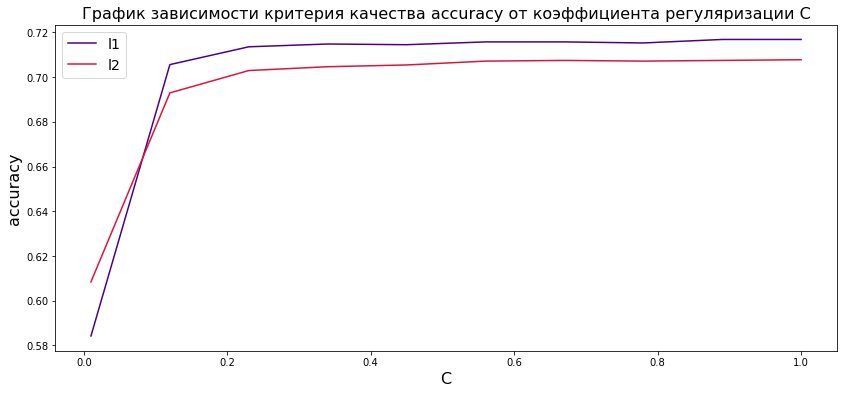

In [30]:
plt.figure(figsize=(14, 6))

plt.plot(c_values, acc_values_l1, label="l1", color = 'indigo')
plt.plot(c_values, acc_values_l2, label="l2", color = 'crimson')

plt.legend(fontsize = 14)
plt.xlabel('C', fontsize=16)
plt.ylabel('accuracy', fontsize=16)   
plt.title("График зависимости критерия качества accuracy от коэффициента регуляризации C", fontsize=16)
plt.show()


Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

По графикам хорошо видно, что $l1$ дает лучший результат, чем $l2$ в большинстве значений `C`. Если при маленьких значениях коэффициента регуляризации `C` график, демонстрирующий accuracy для $l2$ был выше, чем график для $l1$, то затем ситуация измеилась. Поэтому мы можем сказать, что оптимальное значение параметра `penalty` - это $l1$. Если говорить про параметр `C`, то можно заметить, что наибольшая accuracy (где-то между 0.71-0.72) достигается при значении параметра `C` около 0.9.

Однако стоит провести более точные вычисления:

In [31]:
best_params = clf_grid.best_params_
print(best_params)

{'lr__C': 0.89, 'lr__penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [32]:
# Оптимальные параметры
optim_c = best_params['lr__C']
optim_penalty = best_params['lr__penalty']

# Подставляем их
best_lr_clf = LogisticRegression(solver = 'saga', multi_class='multinomial', 
                                 max_iter = 10000, penalty = optim_penalty, C = optim_c, n_jobs = -1)

best_lr_clf.fit(train_feature_matrix, train_labels)

p = best_lr_clf.predict_proba(test_feature_matrix)
print(p)

[[1.17430632e-01 8.38798908e-01 7.26127746e-03 ... 2.59072455e-02
  8.75352265e-03 1.82516909e-03]
 [7.25710961e-01 2.18792883e-01 6.78534584e-05 ... 3.25054807e-03
  6.90275483e-05 5.21087040e-02]
 [7.00404377e-02 7.58165925e-01 5.70686958e-02 ... 5.91439907e-02
  5.42448715e-02 8.12077854e-04]
 ...
 [2.10945661e-01 7.18303595e-01 4.84498385e-03 ... 4.60394092e-02
  1.51922089e-02 4.66573554e-03]
 [2.63222346e-02 7.74535058e-01 9.55490284e-02 ... 6.40529091e-02
  3.84224995e-02 1.33762716e-04]
 [2.64801294e-01 7.21999184e-01 1.14623708e-03 ... 6.07133870e-03
  2.97049872e-03 2.91371932e-03]]


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [33]:
# усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам
probs_1 = p.mean(axis = 0)

num_labels = test_labels.shape[0]
res_2 = np.unique(test_labels, return_index = False, return_counts = True)

# То, сколько раз встречалось каждое уникальное значение
counts_2 = res_2[1]

# вероятности принадлежности к классу на основе частот меток классов в обучающей выборке
probs_2 = counts_2 / num_labels

print("Первый способ:")
print(probs_1)
print("Второй способ:")
print(probs_2)

Первый способ:
[0.36216078 0.48628237 0.0637101  0.00561082 0.0184527  0.03119624
 0.032587  ]
Второй способ:
[0.356875 0.49     0.059375 0.006875 0.0175   0.035    0.034375]


Как мы видим, полученные обоими способами вероятности близки (совпадают в пределах погрешностей). 

Визульно заметно, что первые четыре значения очень близки, оставшиеся же просто довольно маленькие, но и про них можно заметить, что они с определенной точностью близки.

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix,
    labels, 
    test_size = 0.2,
    random_state = 42,
)

In [36]:
clf = KNeighborsClassifier(weights='uniform')
clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
predictions = clf.predict(test_feature_matrix)

In [38]:
acc = accuracy_score(test_labels, predictions)
print("accuracy : ", acc)

accuracy :  0.705625


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

'uniform' мы уже попробовали выше, теперь перейдем к 'distance':

In [39]:
clf2 = KNeighborsClassifier(weights = 'distance')
clf2.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [40]:
predictions = clf2.predict(test_feature_matrix)
acc = accuracy_score(test_labels, predictions)
print("accuracy : ", acc)
#print(predictions)

accuracy :  0.73625


Как можно заметить, в нашем случае получилось, что стратегия для вычисления весов 'distance' лучше, чем 'uniform', поскольку значение accuracy выше.

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [41]:
# число соседей
num_neighbors = np.arange(1, 11, 1)
paras = {'n_neighbors': num_neighbors}

# uniform
knn_grid_u = GridSearchCV(clf, param_grid = paras, cv = 2, scoring = 'accuracy', n_jobs = -1)

# distance
knn_grid_d = GridSearchCV(clf2, param_grid = paras, cv = 2, scoring = 'accuracy', n_jobs = -1)

#fit our models
knn_grid_u.fit(train_feature_matrix, train_labels)
knn_grid_d.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

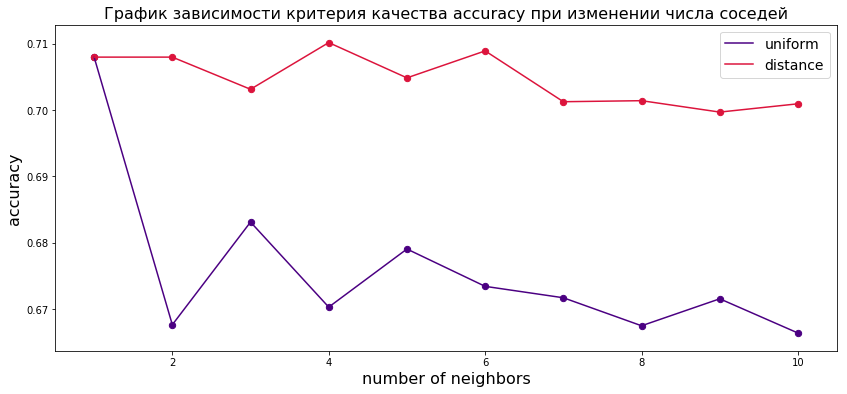

In [42]:
num_neighbors = np.arange(1, 11, 1)

graph_u = knn_grid_u.cv_results_['mean_test_score']
graph_d = knn_grid_d.cv_results_['mean_test_score']

plt.figure(figsize=(14, 6))
plt.plot(num_neighbors, graph_u, label = "uniform", color = 'indigo')
plt.scatter(num_neighbors, graph_u, s = 40,  color = 'indigo', alpha = 1)
plt.plot(num_neighbors, graph_d, label = "distance", color = 'crimson')
plt.scatter(num_neighbors, graph_d, s = 40,  color = 'crimson', alpha = 1)
plt.legend(fontsize = 14)
plt.xlabel('number of neighbors', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)   
plt.title("График зависимости критерия качества accuracy при изменении числа соседей", fontsize = 16)
plt.show()

Как мы видим, при числе соседей, равном единице, значение критерия качества accuracy для uniform самое большое. Таким образом, можем предположить, что оптимальное число соседей равно единице. Однако для distance самое большое значение при числе соседей, равно четырем, если судить по графику. Причем это значение больше, чем у uniform при числе соседей, равном одному. Таким образом, можно предположить, что оптимальное число соседей равно четырем и использовать лучше distance, а не uniform. Если в первой точке значения а графиках совпали, то дальше график для uniform был значительно ниже графика для distance.

На всякий случай проверим то, что мы увидели на графике, потому что, например, при числе соседей, равном шести, значение accuracy тоже поднимается и достигает практически того же уровня, что и при четырех соседях.

In [43]:
best_neighbors = knn_grid_d.best_params_
print(best_neighbors)

{'n_neighbors': 4}


Как мы видим, мы действительно не ошиблись и оптимальное число соседей равно четырем. Это значение и будем использоваь для последующих вычислений.

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [44]:
# distance and 4 neighbors
opt_estimator = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', n_jobs = -1)

#fit our model
opt_estimator.fit(train_feature_matrix, train_labels)

opt_estimator.predict_proba
p = opt_estimator.predict_proba(test_feature_matrix)
print('probs : ')
print(p)

probs : 
[[0.30257349 0.69742651 0.         ... 0.         0.         0.        ]
 [0.50308746 0.24860975 0.         ... 0.         0.         0.24830279]
 [0.11346117 0.88653883 0.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.27270273 0.72729727 0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]]


In [45]:
# усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам
probs_1 = p.mean(axis = 0)

print("Вероятности: ")
print(probs_1)

Вероятности: 
[0.35253771 0.50296628 0.05960119 0.00566491 0.02178912 0.02800062
 0.02944016]


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [46]:
delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

*Логистическая регрессия*

Вспомним, какие у нас были лучшие параметры:
* С: 0.89
* penalty: 'l1'

Используем эти параметры:

In [48]:
#model with certain parameters
del_lr_clf = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000, penalty = 'l1', C = 0.89)

#fir our model
del_lr_clf.fit(train_feature_matrix, train_labels)

prediction_lr = del_lr_clf.predict(delayed_feature_matrix)
acc_lr = accuracy_score(delayed_labels, prediction_lr)

print('LogReg accuracy : ')
print(acc_lr)

LogReg accuracy : 
0.698


*kNN*

В данном случае мы рассматривали параметр числа соседей. И в итоге получили, что оптимальное число соседей равно четырем. Кроме того, мы выяснили, что лучше использовать стратегию вычисления весов distance, а не uniform.

Используем эти значения:

In [49]:
#model with certain parameters
del_knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', n_jobs = -1)

#fit our model
del_knn.fit(train_feature_matrix, train_labels)

prediction_knn = del_knn.predict(delayed_feature_matrix)
acc_knn = accuracy_score(delayed_labels, prediction_knn)

print('kNN accuracy : ')
print(acc_knn)

kNN accuracy : 
0.7645


В плане критерия качества accuracy лучший результат показала модель kNN. Значение accuracy значительно больше, чем у логистической регрессии: 0.7654 в сравнении с 0.698.

Также стоит добавит, что kNN работает намного быстрее, что тоже является его преимуществом.